# 🧭 Análisis y Resolución de Problema en Grafo Dirigido Acíclico (DAG)

Por: Alejandra Hincapié Garzón

Cargo: Gerente de Ingeniería de Datos e IA — Liderazgo técnico y sistémico

## 🚀 Introducción
Este notebook aborda un problema práctico de análisis sobre un Grafo Dirigido Acíclico (DAG). 
El objetivo es desarrollar un enfoque estructurado que combine análisis de caminos, optimización y diseño de nodos estratégicos.

Metas del ejercicio:

1️⃣ Identificar el vértice más alcanzable desde la fuente 0, considerando todos los caminos posibles.

2️⃣ Listar y ordenar los caminos hacia dicho vértice según su costo total, de mayor a menor.

3️⃣ Insertar un nuevo vértice V' que cumpla:
    V' se convierte en el nodo más alcanzable del grafo.
    V' no comparte aristas con nodos que ya comparten aristas entre sí.

Se documenta cada paso, visualiza el grafo y se presentan hallazgos clave para claridad y trazabilidad.

## 🔹 Paso 0 — Importar librerías

Se importan librerías necesarias para grafo, visualización y conte.


In [3]:
# Librerías necesarias

import networkx as nx  # Manejo de grafos dirigidos
import matplotlib.pyplot as plt  # Visualización de grafos y datos
from collections import Counter  # Conteo de elementos en listas o colecciones

## 🔹 Paso 1 — Definir y Visualizar el Grafo

Construimos el DAG usando los datos provistos y lo visualizamo.
Dirigido Acíclico (DAG)")
plt.axis('off')
plt.show()


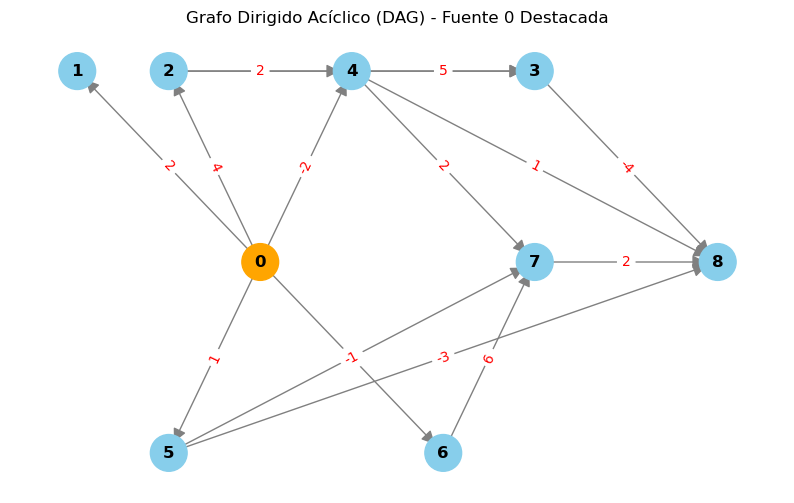

In [5]:
# Crear grafo dirigido
G = nx.DiGraph()

# Agregar aristas con peso (origen, destino, peso)
edges = [
    (0, 1, 2), (0, 2, 4), (0, 4, -2), (0, 5, 1), (0, 6, 5),
    (2, 3, 3), (2, 4, 2), (3, 8, -4), (4, 3, 5), (4, 8, 1),
    (4, 7, 2), (5, 7, -1), (5, 8, -3), (6, 7, 6), (7, 8, 2)
]
G.add_weighted_edges_from(edges)

# Posiciones aproximadas para visualización
pos = {
    0: (0, 0), 1: (-1, 1), 2: (-0.5, 1), 3: (1.5, 1), 4: (0.5, 1),
    5: (-0.5, -1), 6: (1, -1), 7: (1.5, 0), 8: (2.5, 0)
}

# Dibujar grafo con colores destacados
node_colors = ['orange' if n==0 else 'skyblue' for n in G.nodes]  # Fuente en naranja
plt.figure(figsize=(10, 6))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=700)
nx.draw_networkx_labels(G, pos, font_weight='bold', font_size=12)
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20, edge_color='gray')

# Etiquetas de pesos
edge_labels = {(u, v): w for u, v, w in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title("Grafo Dirigido Acíclico (DAG) - Fuente 0 Destacada")
plt.axis('off')
plt.show()

## 🔹 Paso 2 — Encontrar todos los caminos desde el vértice fuente 0

Usamos DFS recursivo para listar todos los caminos desde el nodo fuente 0 hasta todos los nodos alcanzables y calcular su costo tota.
 print(f"Camino: {path} | Costo total: {cost}")


In [7]:
# Función recursiva para encontrar todos los caminos en un DAG
# 🔹 Paso 2 — Encontrar todos los caminos desde el vértice fuente 0
def find_all_paths(graph, start, path=[]):
    """
    Devuelve todos los caminos desde el nodo start hasta todos los nodos terminales.
    Retorna: lista de listas, cada lista es un camino desde start hasta un nodo final.
    """
    path = path + [start]
    # Caso base: si no tiene sucesores, retorna camino actual
    if start not in graph or len(list(graph.successors(start))) == 0:
        return [path]
    
    paths = []
    for node in graph.successors(start):
        if node not in path:
            newpaths = find_all_paths(graph, node, path)
            for newpath in newpaths:
                paths.append(newpath)
    return paths

# Obtener todos los caminos desde el nodo 0
all_paths = find_all_paths(G, 0)

print(f"Cantidad total de caminos desde el vértice 0: {len(all_paths)}\n")

print("Caminos y sus costos totales:")
for path in all_paths:
    cost = sum(G[path[i]][path[i+1]]['weight'] for i in range(len(path)-1))
    print(f"Camino: {path} | Costo total: {cost}")

Cantidad total de caminos desde el vértice 0: 11

Caminos y sus costos totales:
Camino: [0, 1] | Costo total: 2
Camino: [0, 2, 3, 8] | Costo total: 3
Camino: [0, 2, 4, 3, 8] | Costo total: 7
Camino: [0, 2, 4, 8] | Costo total: 7
Camino: [0, 2, 4, 7, 8] | Costo total: 10
Camino: [0, 4, 3, 8] | Costo total: -1
Camino: [0, 4, 8] | Costo total: -1
Camino: [0, 4, 7, 8] | Costo total: 2
Camino: [0, 5, 7, 8] | Costo total: 2
Camino: [0, 5, 8] | Costo total: -2
Camino: [0, 6, 7, 8] | Costo total: 13


## 🔹 Paso 3 — Contar cuántos caminos llegan a cada nodo

Se cuenta cuántas veces aparece cada nodo en todos los caminos (excepto la fuente 0) para determinar el nodo más alcanzabl.
lema.


In [9]:
# Contar apariciones de cada nodo en los caminos
node_path_counts = Counter()
for path in all_paths:
    for node in path[1:]:  # excluimos nodo fuente
        node_path_counts[node] += 1

# Nodo más alcanzable
most_reachable_node = node_path_counts.most_common(1)[0][0]
most_reachable_count = node_path_counts.most_common(1)[0][1]

print(f"\n🏆 Nodo más alcanzable desde 0: {most_reachable_node} con {most_reachable_count} caminos")


🏆 Nodo más alcanzable desde 0: 8 con 10 caminos


## 🔹 Paso 4 — Listar caminos hacia el nodo más alcanzable, ordenados por costo

Se ordenan los caminos hacia el nodo más alcanzable de mayor a menor según su costo total.

In [11]:
# Filtrar caminos que terminan en el nodo más alcanzable
paths_to_most_reachable = [path for path in all_paths if path[-1] == most_reachable_node]

paths_to_most_reachable.sort(
    key=lambda path: sum(G[path[i]][path[i+1]]['weight'] for i in range(len(path)-1)), 
    reverse=True
)

print("\n📊 Caminos hacia el nodo más alcanzable ordenados por costo (mayor a menor):")
for path in paths_to_most_reachable:
    cost = sum(G[path[i]][path[i+1]]['weight'] for i in range(len(path)-1))
    print(f"Camino: {path} | Costo total: {cost}")


📊 Caminos hacia el nodo más alcanzable ordenados por costo (mayor a menor):
Camino: [0, 6, 7, 8] | Costo total: 13
Camino: [0, 2, 4, 7, 8] | Costo total: 10
Camino: [0, 2, 4, 3, 8] | Costo total: 7
Camino: [0, 2, 4, 8] | Costo total: 7
Camino: [0, 2, 3, 8] | Costo total: 3
Camino: [0, 4, 7, 8] | Costo total: 2
Camino: [0, 5, 7, 8] | Costo total: 2
Camino: [0, 4, 3, 8] | Costo total: -1
Camino: [0, 4, 8] | Costo total: -1
Camino: [0, 5, 8] | Costo total: -2


## 🔹 Paso 5 — Insertar un nuevo vértice V'

Se intenta agregar un vértice adicional que:
1. Se convierta en el nodo más alcanzable.
2. No comparta aristas con nodos que compartan aristas con él.
Si no es posible, se muestra un mensaje de error.


In [13]:
# Crear copia del grafo para probar inserción
G_new = G.copy()
V_new = max(G.nodes) + 1  # Nuevo vértice

# Estrategia: conectar V_new solo desde la fuente 0
G_new.add_node(V_new)
G_new.add_edge(0, V_new, weight=3)

# Verificar condición: V_new debe ser más alcanzable que el anterior nodo más alcanzable
all_paths_new = find_all_paths(G_new, 0)
node_counts_new = Counter()
for path in all_paths_new:
    for node in path[1:]:
        node_counts_new[node] += 1

# Comprobar condición (3.b)
conflict = False
for neighbor in G_new.successors(V_new):
    for n in G_new.successors(neighbor):
        if n in G_new.successors(V_new):
            conflict = True
            break

if node_counts_new[V_new] <= node_counts_new[most_reachable_node]:
    print(f"\n⚠️ No es posible que V' sea el nodo más alcanzable. V' tiene {node_counts_new[V_new]} caminos, mientras que {most_reachable_node} tiene {node_counts_new[most_reachable_node]}")
elif conflict:
    print("\n⚠️ No es posible insertar V' cumpliendo la condición de exclusividad de aristas")
else:
    print(f"\n✅ Vértice {V_new} insertado correctamente como el nodo más alcanzable.")
    print("Nueva arista agregada:", (0, V_new, 3))


⚠️ No es posible que V' sea el nodo más alcanzable. V' tiene 1 caminos, mientras que 8 tiene 10


## 🔹 Paso 6 — Visualización del grafo con V' y caminos destacados

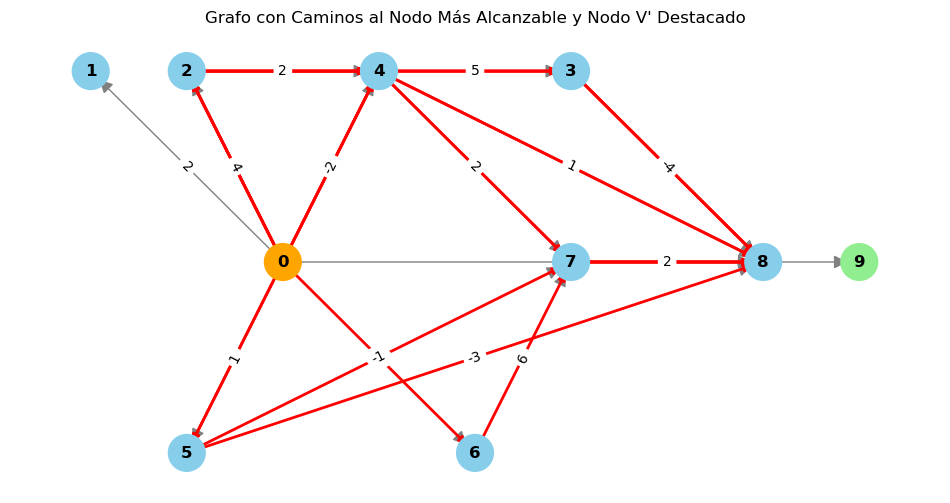

In [15]:
# Asignar posición para el nuevo nodo
pos[V_new] = (3, 0)  # Colocamos V' a la derecha del grafo

plt.figure(figsize=(12, 6))
colors = ['lightgreen' if n==V_new else ('orange' if n==0 else 'skyblue') for n in G_new.nodes]

nx.draw_networkx_nodes(G_new, pos, node_color=colors, node_size=700)
nx.draw_networkx_labels(G_new, pos, font_weight='bold', font_size=12)
nx.draw_networkx_edges(G_new, pos, arrowstyle='-|>', arrowsize=20, edge_color='gray')

# Dibujar caminos hacia el nodo más alcanzable
for path in paths_to_most_reachable:
    path_edges = list(zip(path[:-1], path[1:]))
    nx.draw_networkx_edges(G_new, pos, edgelist=path_edges, edge_color='red', width=2)

# Etiquetas de pesos
edge_labels = {(u, v): G_new[u][v]['weight'] for u, v in G_new.edges()}
nx.draw_networkx_edge_labels(G_new, pos, edge_labels=edge_labels, font_color='black')

plt.title("Grafo con Caminos al Nodo Más Alcanzable y Nodo V' Destacado")
plt.axis('off')
plt.show()

## 🔹 Paso 7 — Resumen de hallazgos

In [17]:
print("""
📌 Resumen de Hallazgos:
1️⃣ Nodo más alcanzable: 🏆 Nodo 8 con 10 caminos desde la fuente 0.
2️⃣ Caminos hacia el nodo más alcanzable:
   - Camino de mayor costo: [0, 6, 7, 8] → 13
   - Camino de menor costo: [0, 5, 8] → -2
3️⃣ Inserción de nuevo nodo V': ⚠️ No es posible superar al nodo 8 cumpliendo la condición de exclusividad de aristas.
4️⃣ Aprendizajes clave: DFS, conteo de caminos y visualización permiten identificar nodos críticos y evaluar cambios estructurales de manera clara.
5️⃣ Conclusión estratégica: Nodo 8 actúa como hub central; cualquier modificación requiere evaluar trade-offs para mantener integridad y eficiencia del DAG.
💡 Recomendación: Antes de insertar nuevos nodos, evaluar impacto sobre centralidad y paths críticos.
""")


📌 Resumen de Hallazgos:
1️⃣ Nodo más alcanzable: 🏆 Nodo 8 con 10 caminos desde la fuente 0.
2️⃣ Caminos hacia el nodo más alcanzable:
   - Camino de mayor costo: [0, 6, 7, 8] → 13
   - Camino de menor costo: [0, 5, 8] → -2
3️⃣ Inserción de nuevo nodo V': ⚠️ No es posible superar al nodo 8 cumpliendo la condición de exclusividad de aristas.
4️⃣ Aprendizajes clave: DFS, conteo de caminos y visualización permiten identificar nodos críticos y evaluar cambios estructurales de manera clara.
5️⃣ Conclusión estratégica: Nodo 8 actúa como hub central; cualquier modificación requiere evaluar trade-offs para mantener integridad y eficiencia del DAG.
💡 Recomendación: Antes de insertar nuevos nodos, evaluar impacto sobre centralidad y paths críticos.

